## Modelos de Regresión Lineal

### Modelo con datos simulados

* Y = a + b * x 
* X : 100 valor distribuidos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estara distribuido segun una N(0, 0.8)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# np.random.seed(1997)

In [7]:
x = 1.5 + 2.5 * np.random.randn(100)

In [8]:
res = 0 + 0.8 * np.random.randn(100)

In [9]:
y_pred= 5 + 1.9 * x

In [10]:
y_act = 5 + 1.9 * x + res

In [11]:
x_list=x.tolist()
y_pred_list= y_pred.tolist()
y_act_list= y_act.tolist()

In [12]:
data = pd.DataFrame(
    {
        'x': x_list,
        'y_actual': y_act_list,
        'y_prediccion': y_pred_list,
    }
)

In [13]:
data.head()

,x,y_actual,y_prediccion
0,3.420810,11.652080,11.499540
1,7.028111,18.623602,18.353412
2,1.386181,6.521320,7.633744
3,1.159176,7.869644,7.202434
4,3.715024,11.702109,12.058545


In [14]:
y_men = [np.mean(y_act) for i in range(1, len(x_list)+1)]

Text(0.5, 1.0, 'Valor actual vs Predicción')

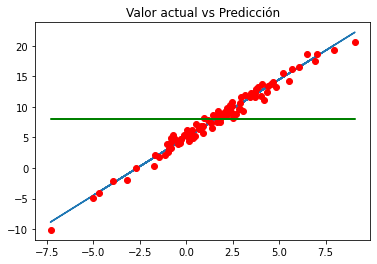

In [15]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x,y_act, 'ro')
plt.plot(x,y_men, 'g')
plt.title("Valor actual vs Predicción")

SSD = Distancias del dato observado con respecto al modelo
SST = Distancia del dato observado con respecto al promedio
SSR = Distancia entre la predicción y el promedio

In [16]:
y_m = np.mean(y_act)
data["SSR"] = (data["y_prediccion"]-y_m)**2
data["SSD"] = (data["y_prediccion"]-data["y_actual"])**2
data["SST"] = (data["y_actual"]-y_m)**2

In [17]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,3.420810,11.652080,11.499540,11.622499,0.023268,12.685840
1,7.028111,18.623602,18.353412,105.330208,0.073003,110.949171
2,1.386181,6.521320,7.633744,0.208499,1.237487,2.461889
3,1.159176,7.869644,7.202434,0.788414,0.445169,0.048716
4,3.715024,11.702109,12.058545,15.746487,0.127047,13.044723


In [18]:
SSR= sum(data['SSR'])
SSD= sum(data['SSD'])
SST= sum(data['SST'])

In [19]:
SSR

2607.0430776005387

In [20]:
SSD

59.36088367754125

In [21]:
SST

2631.211316712316

In [22]:
SSR+SSD

2666.40396127808

In [23]:
R2= SSR / SST
R2

0.9908147859663451

(array([ 2.,  7., 10., 14., 25., 10., 11., 12.,  6.,  3.]),
 array([-1.75529424, -1.39671977, -1.03814531, -0.67957084, -0.32099637,
         0.0375781 ,  0.39615256,  0.75472703,  1.1133015 ,  1.47187597,
         1.83045043]),
 <BarContainer object of 10 artists>)

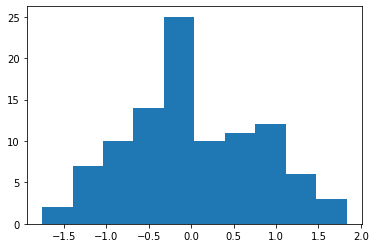

In [24]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión

* y = a + b * x
* b = sum((xi-x_m)*(yi-y_m))/sum((xi-x_m) ** 2)
* a = y_m - b * x_m

In [25]:
x_mean = np.mean(data['x'])
y_mean = np.mean(data['y_actual'])
x_mean , y_mean

(1.635931034400048, 8.090361102782609)

In [26]:
data['beta_n']= (data['x']-x_mean)*(data['y_actual']-y_mean)
data['beta_d']= (data['x']-x_mean)**2

In [27]:
beta = sum(data['beta_n'])/sum(data['beta_d'])

In [28]:
alpha = y_mean - beta * x_mean

In [29]:
alpha, beta

(5.003033523064046, 1.887199102406412)

El modelo lineal obtenido por regresion es: y = 5.06229206905088 + 1.9105530907517014 * x

In [30]:
data['y_model']= alpha + beta * data['x']

In [31]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,3.420810,11.652080,11.499540,11.622499,0.023268,12.685840,6.357238,3.185794,11.458784
1,7.028111,18.623602,18.353412,105.330208,0.073003,110.949171,56.797137,29.075609,18.266479
2,1.386181,6.521320,7.633744,0.208499,1.237487,2.461889,0.391868,0.062375,7.619033
3,1.159176,7.869644,7.202434,0.788414,0.445169,0.048716,0.105228,0.227295,7.190629
4,3.715024,11.702109,12.058545,15.746487,0.127047,13.044723,7.509160,4.322627,12.014023


In [32]:

SSR= sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST= sum((data["y_actual"]-y_mean)**2)

In [33]:
SSR, SSD, SST

(2572.0008380866716, 59.210478625643425, 2631.2113167123166)

In [34]:
R2 = SSR / SST

In [35]:
R2

0.9774968744435061

Text(0.5, 1.0, 'Valor actual vs Predicción')

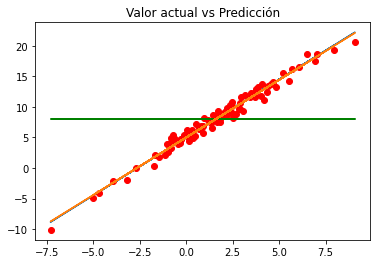

In [36]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list)+1)]
%matplotlib inline
plt.plot(data['x'],data['y_prediccion'])
plt.plot(data['x'],data['y_actual'], 'ro')
plt.plot(data['x'],y_mean, 'g')
plt.plot(data['x'],data['y_model'] )
plt.title("Valor actual vs Predicción")

## Error estandar de los residuos (RSE)

In [37]:
RSE = np.sqrt(SSD/ ( len(data) - 2 ))

In [38]:
RSE

0.7772956692305217